In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor

In [2]:
df_original = pd.read_csv('pharmacy_tx.csv')

In [3]:
df = df_original.copy().drop(columns = ['tx_date', 'pharmacy', 'patient_pay'])

In [4]:
df['bin'] = df['bin'].astype(str)
df['pcn'] = df['pcn'].astype(str).str.upper()
df['group'] = df['group'].astype(str).str.upper()
df['rejected'][df['rejected'] == False] = 0
df['rejected'][df['rejected'] == True] = 1

<ipython-input-4-452d2e24b45f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rejected'][df['rejected'] == False] = 0


In [5]:
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 614, shuffle = True, stratify = df['rejected'])

In [6]:
sum(df_test['rejected'] == 0) / len(df_test)

0.9218662216229836

In [7]:
f1_train = df_train.groupby(['drug'], as_index = False).rejected.mean()
f1_train['f1'] = f1_train['rejected']
del f1_train['rejected']
df_train = pd.merge(df_train, f1_train, on = ['drug'], how = 'left')

In [8]:
f2_train = df_train.groupby(['diagnosis', 'drug'], as_index = False).rejected.mean()
f2_train['f2'] = f2_train['rejected']
del f2_train['rejected']
df_train = pd.merge(df_train, f2_train, on = ['diagnosis', 'drug'], how = 'left')

In [9]:
f3_train = df_train.groupby(['drug', 'bin'], as_index = False).rejected.mean()
f3_train['f3'] = f3_train['rejected']
del f3_train['rejected']
df_train = pd.merge(df_train, f3_train, on = ['drug', 'bin'], how = 'left')

In [10]:
f4_train = df_train.groupby(['drug', 'pcn'], as_index = False).rejected.mean()
f4_train['f4'] = f4_train['rejected']
del f4_train['rejected']
df_train = pd.merge(df_train, f4_train, on = ['drug', 'pcn'], how = 'left')

In [11]:
f5_train = df_train.groupby(['drug', 'group'], as_index = False).rejected.mean()
f5_train['f5'] = f5_train['rejected']
del f5_train['rejected']
df_train = pd.merge(df_train, f5_train, on = ['drug', 'group'], how = 'left')

In [12]:
r_train = df_train.groupby(['diagnosis', 'drug', 'bin', 'pcn', 'group'], as_index = False).rejected.mean()
r_train['r'] = r_train['rejected']
del r_train['rejected']
df_train = pd.merge(df_train, r_train, on = ['diagnosis', 'drug', 'bin', 'pcn', 'group'], how = 'left')

In [13]:
f1_test = df_test.groupby(['drug'], as_index = False).rejected.mean()
f1_test['f1'] = f1_test['rejected']
del f1_test['rejected']
df_test = pd.merge(df_test, f1_test, on = ['drug'], how = 'left')

In [14]:
f2_test = df_test.groupby(['diagnosis', 'drug'], as_index = False).rejected.mean()
f2_test['f2'] = f2_test['rejected']
del f2_test['rejected']
df_test = pd.merge(df_test, f2_test, on = ['diagnosis', 'drug'], how = 'left')

In [15]:
f3_test = df_test.groupby(['drug', 'bin'], as_index = False).rejected.mean()
f3_test['f3'] = f3_test['rejected']
del f3_test['rejected']
df_test = pd.merge(df_test, f3_test, on = ['drug', 'bin'], how = 'left')

In [16]:
f4_test = df_test.groupby(['drug', 'pcn'], as_index = False).rejected.mean()
f4_test['f4'] = f4_test['rejected']
del f4_test['rejected']
df_test = pd.merge(df_test, f4_test, on = ['drug', 'pcn'], how = 'left')

In [17]:
f5_test = df_test.groupby(['drug', 'group'], as_index = False).rejected.mean()
f5_test['f5'] = f5_test['rejected']
del f5_test['rejected']
df_test = pd.merge(df_test, f5_test, on = ['drug', 'group'], how = 'left')

In [18]:
r_test = df_test.groupby(['diagnosis', 'drug', 'bin', 'pcn', 'group'], as_index = False).rejected.mean()
r_test['r'] = r_test['rejected']
del r_test['rejected']
df_test = pd.merge(df_test, r_test, on = ['diagnosis', 'drug', 'bin', 'pcn', 'group'], how = 'left')

In [19]:
X_train = df_train[['f1', 'f2', 'f3', 'f4', 'f5']]
y_train = df_train['r']
train_unique = df_train[['f1', 'f2', 'f3', 'f4', 'f5', 'r']].drop_duplicates()
X_train_unique = train_unique[['f1', 'f2', 'f3', 'f4', 'f5']]
y_train_unique = train_unique['r']
X_test = df_test[['f1', 'f2', 'f3', 'f4', 'f5']]
y_test = df_test['r']

In [20]:
lr = LinearRegression()
lr.fit(X_train_unique, y_train_unique)
lr_pred = lr.predict(X_test)
lr_pred[lr_pred < 0.027777777777777776] = 0
print(mean_squared_error(lr_pred, y_test, squared = False))
print(mean_absolute_error(lr_pred, y_test))
print(r2_score(lr_pred, y_test))

0.025649374810661874
0.008569398444661428
0.9569008832439279


In [21]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_pred[lr_pred < 0.027777777777777776] = 0
print(mean_squared_error(lr_pred, y_test, squared = False))
print(mean_absolute_error(lr_pred, y_test))
print(r2_score(lr_pred,y_test))

0.025565385982508217
0.008395804609390715
0.9578310372064467


In [22]:
rf = RandomForestRegressor(n_estimators = 100, criterion = 'absolute_error')
rf.fit(X_train_unique, y_train_unique)
rf_pred = rf.predict(X_test)
rf_pred[rf_pred < 0.027777777777777776] = 0
print(mean_squared_error(rf_pred, y_test, squared = False))
print(mean_absolute_error(rf_pred, y_test))
print(r2_score(rf_pred, y_test))

0.025211334233811278
0.008006671253351322
0.9593117125759736


In [23]:
#rf = RandomForestRegressor(n_estimators = 100, criterion = 'absolute_error')
#rf.fit(X_train, y_train)
#rf_pred = rf.predict(X_test)
#rf_pred[rf_pred < 0.027777777777777776] = 0
#print(mean_squared_error(rf_pred, y_test, squared = False))
#print(mean_absolute_error(rf_pred, y_test))
#print(r2_score(rf_pred, y_test))

In [24]:
ada = AdaBoostRegressor(n_estimators = 100, learning_rate = 0.01, loss = 'square')
ada.fit(X_train_unique, y_train_unique)
ada_pred = ada.predict(X_test)
ada_pred[ada_pred < 0.027777777777777776] = 0
print(mean_squared_error(ada_pred, y_test, squared = False))
print(mean_absolute_error(ada_pred, y_test))
print(r2_score(ada_pred, y_test))

0.026195079964126164
0.008003280581112524
0.9555458991016184


In [25]:
ada = AdaBoostRegressor(n_estimators = 100, learning_rate = 0.01, loss = 'square')
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
ada_pred[ada_pred < 0.027777777777777776] = 0
print(mean_squared_error(ada_pred, y_test, squared = False))
print(mean_absolute_error(ada_pred, y_test))
print(r2_score(ada_pred, y_test))

0.027558065298082215
0.008469256869749876
0.9506361088221806


In [26]:
gbr = GradientBoostingRegressor(loss='squared_error', n_estimators = 100, learning_rate = 0.12)
gbr.fit(X_train_unique, y_train_unique)
gbr_pred = gbr.predict(X_test)
gbr_pred[gbr_pred < 0.027777777777777776] = 0
print(mean_squared_error(gbr_pred, y_test, squared = False))
print(mean_absolute_error(gbr_pred, y_test))
print(r2_score(gbr_pred, y_test))

0.023344994556588918
0.006707436931373519
0.9646409857370748


In [27]:
gbr = GradientBoostingRegressor(loss='squared_error', n_estimators = 100, learning_rate = 0.12)
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)
gbr_pred[gbr_pred < 0.027777777777777776] = 0
print(mean_squared_error(gbr_pred, y_test, squared = False))
print(mean_absolute_error(gbr_pred, y_test))
print(r2_score(gbr_pred, y_test))

0.02351732962925536
0.006493487254495213
0.964472021074293


In [28]:
hgb = HistGradientBoostingRegressor(loss = 'squared_error', learning_rate = 0.1, max_iter = 100)
hgb.fit(X_train_unique, y_train_unique)
hgb_pred = hgb.predict(X_test)
hgb_pred[hgb_pred < 0.027777777777777776] = 0
print(mean_squared_error(hgb_pred, y_test, squared = False))
print(mean_absolute_error(hgb_pred, y_test))
print(r2_score(hgb_pred, y_test))

0.023089923885306934
0.006511900006714385
0.9655846196137259


In [29]:
hgb = HistGradientBoostingRegressor(loss = 'squared_error', learning_rate = 0.1, max_iter = 100)
hgb.fit(X_train, y_train)
hgb_pred = hgb.predict(X_test)
hgb_pred[hgb_pred < 0.027777777777777776] = 0
print(mean_squared_error(hgb_pred, y_test, squared = False))
print(mean_absolute_error(hgb_pred, y_test))
print(r2_score(hgb_pred, y_test))

0.023367212504029237
0.00621375107233528
0.9651093123988523


In [30]:
print(max(hgb_pred))
print(max(y_test))

0.529316002452189
1.0


In [31]:
sum((hgb_pred == 0) & (y_test == 0)) / sum(y_test == 0)

0.9971355428291678

In [32]:
compare = df_test.copy()[['diagnosis', 'drug', 'bin', 'pcn', 'group']]
compare

,diagnosis,drug,bin,pcn,group
0,Z20.23,branded vivafastat,664344,W1LW9Y,0OGKQ
1,G99.93,generic pucomalol,664344,TPJD,NAN
2,D13.25,branded plazamiglutic,160389,RB7UU,RS5RB3YA
3,U60.52,generic oxasoted,757349,RM0HB,SJVO3GXUURRGO
4,Q85.91,branded cupitelol,664344,NAN,52H8KH0F83K
...,...,...,...,...,...
2782044,Q85.91,branded rulfalol,956971,WM6A,L9QZA
2782045,Q85.91,generic rulfalol,322463,3Y5ZW0,NAN
2782046,H36.57,branded antimab,664344,YFVIA,AJK5MZ25T9IA
2782047,I68.27,generic prazinib,725700,327CKV,IOEAN1DWVV3Y


In [33]:
compare['hgb_pred_diff'] = abs(hgb_pred - y_test)

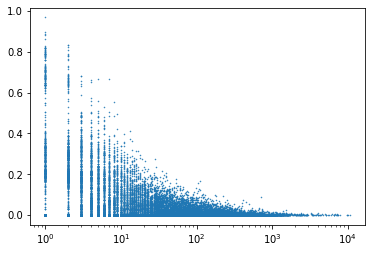

In [34]:
compare_groups = compare.groupby(by = ['diagnosis', 'drug', 'bin', 'pcn', 'group'])
compare_rates = compare_groups.mean()
compare_counts = compare_groups.count()
plt.plot(compare_counts['hgb_pred_diff'], compare_rates['hgb_pred_diff'], 'o', ms=0.5)
plt.xscale('log')

In [38]:
compare = df_test.copy()[['diagnosis', 'drug', 'bin', 'pcn', 'group']]
compare['truth'] = y_test
compare['prediction'] = hgb_pred
compare_unique = compare.drop_duplicates(subset = ['diagnosis', 'drug', 'bin', 'pcn', 'group'])
print(sum((compare_unique['truth'] == 0) & (compare_unique['prediction'] == 0)) / sum(compare_unique['prediction'] == 0))
print(mean_squared_error(compare_unique['prediction'], compare_unique['truth'], squared = False))
print(mean_absolute_error(compare_unique['prediction'], compare_unique['truth']))
print(r2_score(compare_unique['prediction'], compare_unique['truth']))

0.9994365879767875
0.1002130820158395
0.038044084914071616
0.4373294620599609
